In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# Data preparation

In [ ]:
sp_wiki = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp_wiki_df_list = pd.read_html(sp_wiki)

In [ ]:
len(sp_wiki_df_list)

In [ ]:
sp_df = sp_wiki_df_list[0]

In [ ]:
sp_df.head()

In [ ]:
sp_ticker_list = list(sp_df['Symbol'].values)

In [ ]:
df = yf.download(sp_ticker_list)

In [ ]:
df.shape

In [ ]:
sp_volume = df['Volume']

In [ ]:
sp_volume.shape

In [ ]:
sp_volume.to_csv('sp_volume.csv')

# Working with volumes

In [3]:
sp_volume = pd.read_csv('../input/sp-5001/sp_volume (1).csv',index_col=0)

In [4]:
sp_volume.index = pd.to_datetime(sp_volume.index)

In [ ]:
type(sp_volume.index)

We will work with the data for 2017 and 2018. The prediction will be done for January 2019.<br>
The observed companies are S&P 500 top 4: Apple, Google, Microsoft and Amazon.

In [111]:
df_example = sp_volume.loc['2017-01-01':'2019-01-31',['AAPL', 'MSFT', 'AMZN','GOOGL']]

In [112]:
df_example.tail()

,AAPL,MSFT,AMZN,GOOGL
Date,,,,
2019-01-25,134142000.0,31225600.0,4945900.0,1163000.0
2019-01-28,104768400.0,29476700.0,4837700.0,1466700.0
2019-01-29,166348800.0,31490500.0,4632800.0,985200.0
2019-01-30,244439200.0,49471900.0,5783800.0,1472600.0
2019-01-31,162958400.0,55636400.0,10910300.0,2011600.0


In [113]:
df_example.describe()

,AAPL,MSFT,AMZN,GOOGL
count,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02
mean,1.237315e+08,2.729413e+07,4.655076e+06,1.824659e+06
std,5.479950e+07,1.193619e+07,2.420643e+06,7.998690e+05
min,5.005560e+07,7.425600e+06,1.585100e+06,7.089000e+05
25%,8.627120e+07,1.941005e+07,2.931900e+06,1.333800e+06
50%,1.083892e+08,2.367490e+07,3.897300e+06,1.644800e+06
75%,1.452410e+08,3.153210e+07,5.729900e+06,2.051850e+06
max,4.479400e+08,1.112421e+08,1.656500e+07,6.411000e+06


In [114]:
df_example.isnull().sum()

AAPL     2
MSFT     2
AMZN     2
GOOGL    2
dtype: int64

In [115]:
df_example1 = df_example[df_example.isna().any(axis=1)]
df_example1

,AAPL,MSFT,AMZN,GOOGL
Date,,,,
2017-02-20,NaN,NaN,NaN,NaN
2018-12-05,NaN,NaN,NaN,NaN


20.02.2017,05.12.2018  - are the dates, for which we don't have volume values.

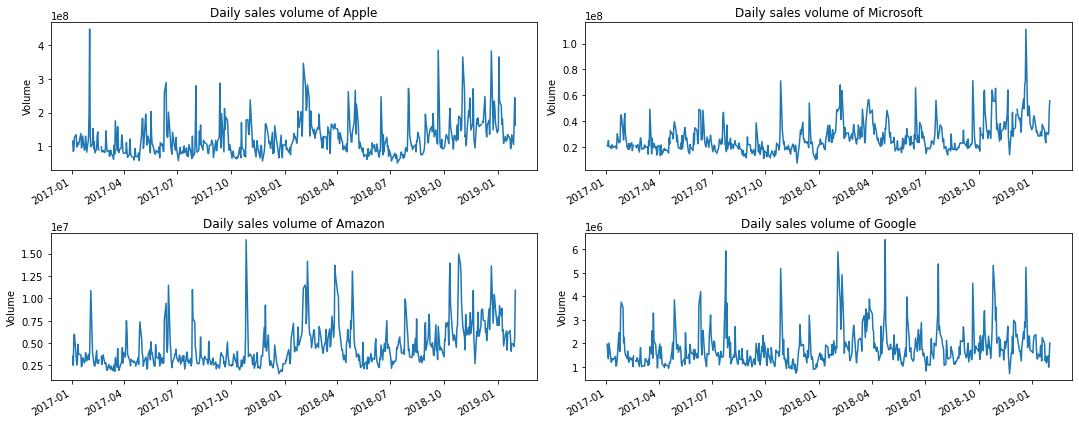

In [118]:
companies = ['Apple','Microsoft','Amazon','Google']
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(df_example.columns, 1):
    plt.subplot(2, 2, i)
    df_example[company].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Daily sales volume of {companies[i-1]}")
    
plt.tight_layout()

## Moving average

Can be used from here https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

# Daily return 

Can be used from the same source

# Correlation

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


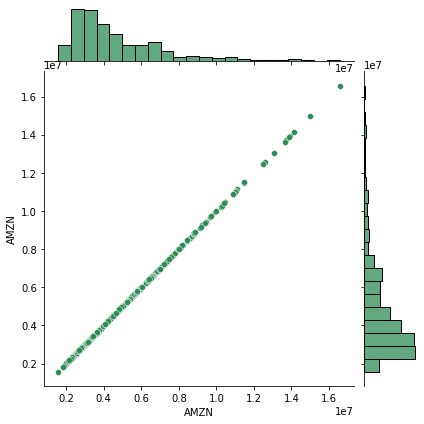

In [119]:
sns.jointplot('AMZN', 'AMZN', df_example, kind='scatter', color='seagreen')

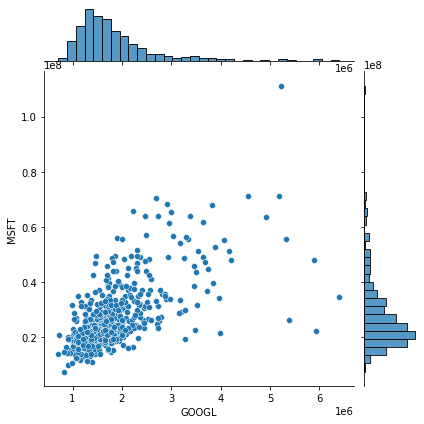

In [121]:
sns.jointplot('GOOGL', 'MSFT', df_example, kind='scatter')

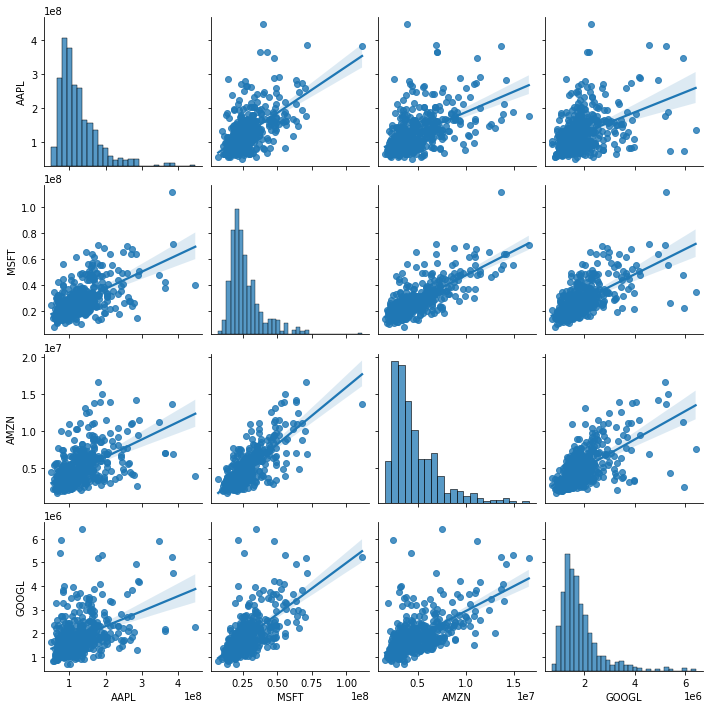

In [122]:
sns.pairplot(df_example, kind='reg')

Histograms show lognormal distribution

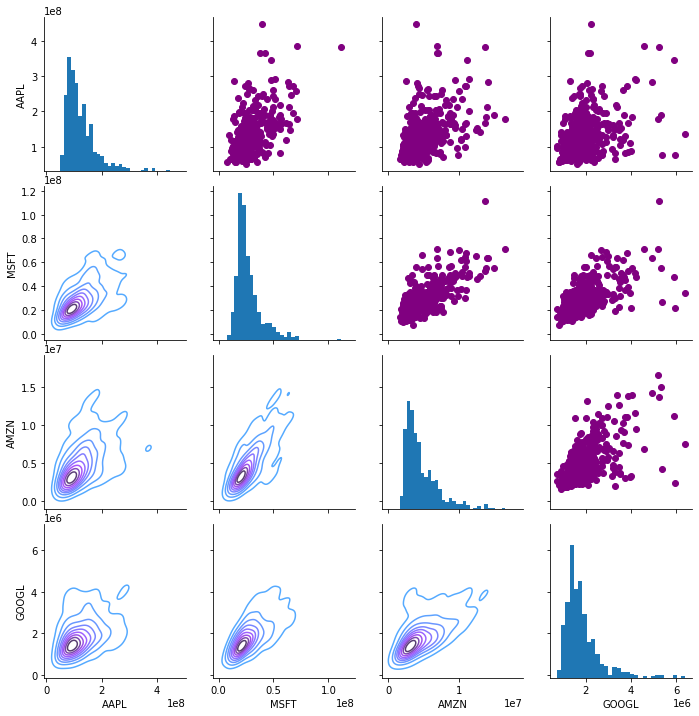

In [123]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(df_example.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:>

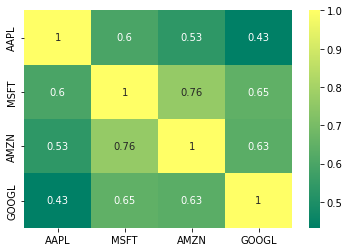

In [124]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(df_example.corr(), annot=True, cmap='summer')

Judging by the heatmap shown above, all companies have high correlation between each other. <br>
The highest values are shown by **Microsoft** and **Amazon**.

# Risk

Can be found by the link

# Prediction of sales volume

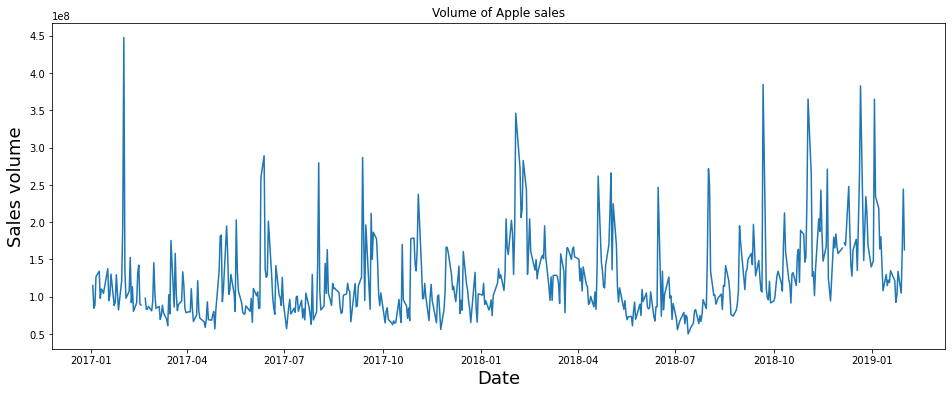

In [125]:
plt.figure(figsize=(16,6))
plt.title('Volume of Apple sales')
plt.plot(df_example['AAPL'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sales volume', fontsize=18)
plt.show()

We will interpolate 2 missing values.

In [127]:
df_example.interpolate(method='linear', inplace=True)
data = pd.DataFrame(df_example['AAPL'])

In [140]:
data.tail(22)

,AAPL
Date,
2018-12-31,140014000.0
2019-01-02,148158800.0
2019-01-03,365248800.0
2019-01-04,234428400.0
2019-01-07,219111200.0
2019-01-08,164101200.0
2019-01-09,180396400.0
2019-01-10,143122800.0
2019-01-11,108092800.0


In [143]:
training_data_len = 525-21

In [145]:
21/525   #how much test data we have

0.04

In [129]:
df_example.isnull().sum()

AAPL     0
MSFT     0
AMZN     0
GOOGL    0
dtype: int64

In [130]:
# Let's check an example for Apple sales
dataset = df_example['AAPL'].values
dataset = dataset.reshape(-1,1)

In [135]:
#5% of the data will be the test data
#training_data_len = int(np.ceil( len(dataset) * .95 ))
#training_data_len

In [137]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

#scaled_data

In [147]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# We will set a coefficient as number of days, which will be as training data
s = 20
for i in range(s, len(train_data)):
    x_train.append(train_data[i-s:i, 0])
    y_train.append(train_data[i, 0])
    #if i<= s+1:
    #    print(x_train)
    #    print(y_train)
    #    print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [148]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer=opt, loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

484/484 [==============================] - 10s 15ms/step - loss: 0.0170


In [149]:
x_train.shape

(484, 20, 1)

In [151]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - s: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(s, len(test_data)):
    x_test.append(test_data[i-s:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

61279385.26873645

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


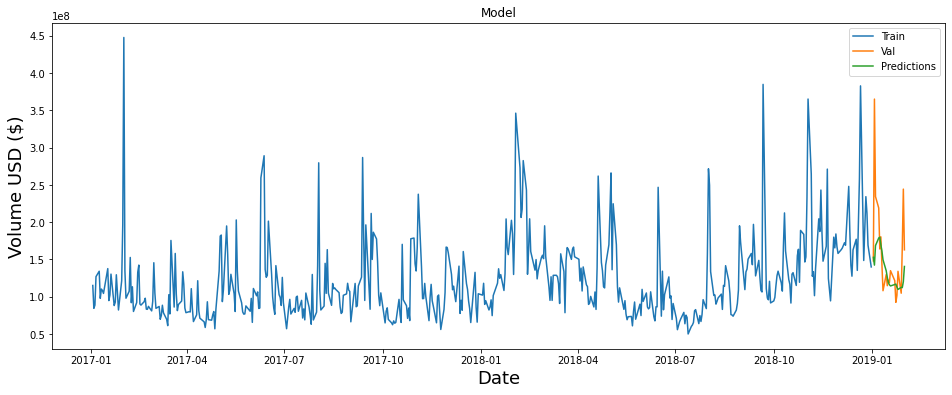

In [152]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['AAPL','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
'''
plt.figure(figsize=(16,6))
plt.title('Volume of Apple sales')
plt.plot(df_example['AAPL'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Sales volume', fontsize=18)
'''
plt.show()

## LSTM modelling

In [163]:
s = [i for i in range(15,30)]
rmse_list = []
for j in s:
    # Create the training data set 
    # Create the scaled training data set
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []


    for i in range(j, len(train_data)):
        x_train.append(train_data[i-j:i, 0])
        y_train.append(train_data[i, 0])
        #if i<= s+1:
        #    print(x_train)
        #    print(y_train)
        #    print()

    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    # Compile the model
    model.compile(optimizer=opt, loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    
    # Create the testing data set
    # Create a new array containing scaled values from index 1543 to 2002 
    test_data = scaled_data[training_data_len - j: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(j, len(test_data)):
        x_test.append(test_data[i-j:i, 0])

    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    rmse_list.append(rmse)
#     print(f'RMSE = {rmse} for {j} number of elements')

#     # Plot the data
#     train = data[:training_data_len]
#     valid = data[training_data_len:]
#     valid['Predictions'] = predictions
#     # Visualize the data
#     plt.figure(figsize=(16,6))
#     plt.title('Model')
#     plt.xlabel('Date', fontsize=18)
#     plt.ylabel('Volume USD ($)', fontsize=18)
#     plt.plot(train)
#     plt.plot(valid[['AAPL','Predictions']])
#     plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')

#     plt.show()

475/475 [==============================] - 13s 21ms/step - loss: 0.0155


In [159]:
min(60832775, 61211015, 59058928, 59648552) #20 elements has the minimal 59058928 rmse

59058928

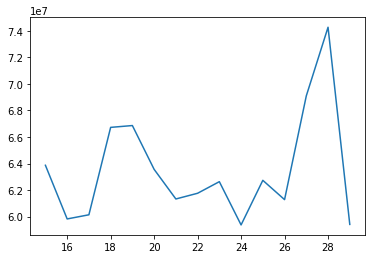

In [165]:
plt.plot(s,rmse_list)